In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

print(x_iris.shape,y_iris.shape)
print(x_iris[0],y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


Roger Federer has won 82% of his ATP matches.


Text(0, 0.5, 'Proportion of double faults per match.')

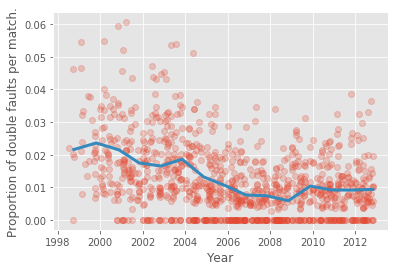

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ','-'))
df = pd.read_csv(filename,parse_dates=['start date'],dayfirst=True)
df['win'] = df['winner'] == player
print(("{player} has won {vic:.0f}% "
       "of his ATP matches.").format(player=player, vic=100*df['win'].mean()))
date = pd.to_datetime(df['start date'])
df['dblfaults'] = (df['player1 double faults']/df['player1 total points total'])
df['dblfaults'].tail()
df['dblfaults'].describe()
df.groupby('surface')['win'].mean()
gb = df.groupby('year')
plt.style.use('ggplot')
plt.plot_date(date, df['dblfaults'],alpha=.25,lw=0)
plt.plot_date(gb['start date'].max(), gb['dblfaults'].mean(),'-',lw=3)
plt.xlabel('Year')
plt.ylabel('Proportion of double faults per match.')

In [9]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
n=100
h=61
q=.5
xbar=float(h)/n
z=(xbar-q)*np.sqrt(n/(q*(1-q)))
z

2.1999999999999997

In [10]:
pval=2*(1-st.norm.cdf(z))
pval

0.02780689502699718

(0, 9.238743259089906)

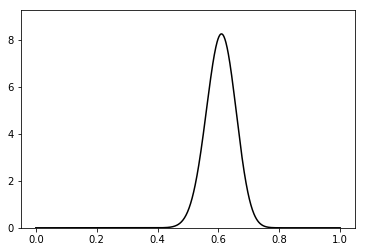

In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
posterior = lambda n,h,q:((n+1)*st.binom(n,q).pmf(h))
n=100
h=61
q=np.linspace(0.,1.,1000)
d=posterior(n,h,q)
plt.plot(q,d,'-k')
plt.ylim(0,d.max()+1)

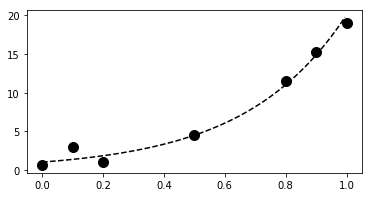

In [2]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline
f=lambda x: np.exp(3*x)
x_tr = np.linspace(0.,2,200)
y_tr = f(x_tr)
x=np.array([0,.1,.2,.5,.8,.9,1])
y=f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,3))
plt.plot(x_tr[:100],y_tr[:100],'--k')
plt.plot(x,y,'ok',ms=10)

In [18]:
lr = lm.LinearRegression()
lr.fit(x[:,np.newaxis],y)
y_lr = lr.predict(x_tr[:,np.newaxis])

y_lr

array([-0.89699926, -0.72442187, -0.55184449, -0.3792671 , -0.20668971,
       -0.03411232,  0.13846507,  0.31104246,  0.48361985,  0.65619723,
        0.82877462,  1.00135201,  1.1739294 ,  1.34650679,  1.51908418,
        1.69166157,  1.86423895,  2.03681634,  2.20939373,  2.38197112,
        2.55454851,  2.7271259 ,  2.89970328,  3.07228067,  3.24485806,
        3.41743545,  3.59001284,  3.76259023,  3.93516762,  4.107745  ,
        4.28032239,  4.45289978,  4.62547717,  4.79805456,  4.97063195,
        5.14320933,  5.31578672,  5.48836411,  5.6609415 ,  5.83351889,
        6.00609628,  6.17867367,  6.35125105,  6.52382844,  6.69640583,
        6.86898322,  7.04156061,  7.214138  ,  7.38671538,  7.55929277,
        7.73187016,  7.90444755,  8.07702494,  8.24960233,  8.42217972,
        8.5947571 ,  8.76733449,  8.93991188,  9.11248927,  9.28506666,
        9.45764405,  9.63022144,  9.80279882,  9.97537621, 10.1479536 ,
       10.32053099, 10.49310838, 10.66568577, 10.83826315, 11.01

Text(0.5, 1.0, 'Linear regression')

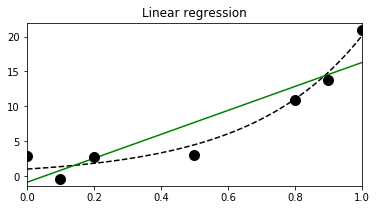

In [19]:
plt.figure(figsize=(6,3))
plt.plot(x_tr,y_tr,'--k')
plt.plot(x_tr,y_lr,'g')
plt.plot(x,y,'ok',ms=10)
plt.xlim(0,1)
plt.ylim(y.min()-1,y.max()+1)
plt.title("Linear regression")

32.94 -15.77 0.00
-350.12 935.41 -846.98 321.67 -41.81 0.00


Text(0.5, 1.0, 'Linear regression')

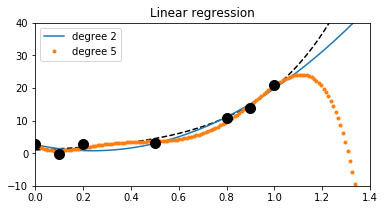

In [23]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3))
plt.plot(x_tr,y_tr,'--k')
for deg, s in zip([2,5],['-','.']):
    lrp.fit(np.vander(x,deg+1),y)
    y_lrp=lrp.predict(np.vander(x_tr,deg+1))
    plt.plot(x_tr,y_lrp,s,label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0,1.4)
    plt.ylim(-10,40)
    print(' '.join(['%.2f'%c for c in lrp.coef_]))
plt.plot(x,y,'ok',ms=10)
plt.title("Linear regression")

22.26 -4.93 0.00
403.96 -1052.32 962.99 -337.20 41.04 0.00


Text(0.5, 1.0, 'Linear regression')

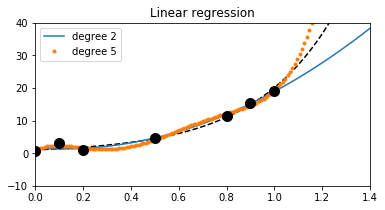

In [5]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3))
plt.plot(x_tr,y_tr,'--k')
for deg, s in zip([2,5],['-','.']):
    lrp.fit(np.vander(x,deg+1),y)
    y_lrp=lrp.predict(np.vander(x_tr,deg+1))
    plt.plot(x_tr,y_lrp,s,label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0,1.4)
    plt.ylim(-10,40)
    print(' '.join(['%.2f'%c for c in lrp.coef_]))
plt.plot(x,y,'ok',ms=10)
plt.title("Linear regression")

11.14 5.63 0.00
2.81 3.38 3.91 4.17 3.76 0.00


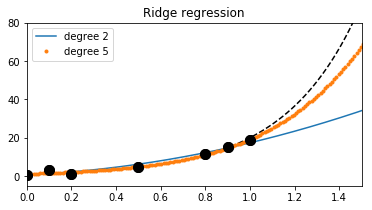

In [6]:
ridge=lm.RidgeCV()
plt.figure(figsize=(6,3))
plt.plot(x_tr,y_tr,'--k')

for deg, s in zip([2,5],['-','.']):
    ridge.fit(np.vander(x,deg+1),y)
    y_ridge=ridge.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr,y_ridge,s,label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0,1.5)
    plt.ylim(-5,80)
    print(' '.join(['%.2f'%c for c in ridge.coef_]))
    plt.plot(x,y,'ok',ms=10)
    plt.title("Ridge regression")

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
dfx_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target,columns=["MEDV"])
df_boston0 = pd.concat([dfx_boston,dfy_boston],axis=1)
df_boston0.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


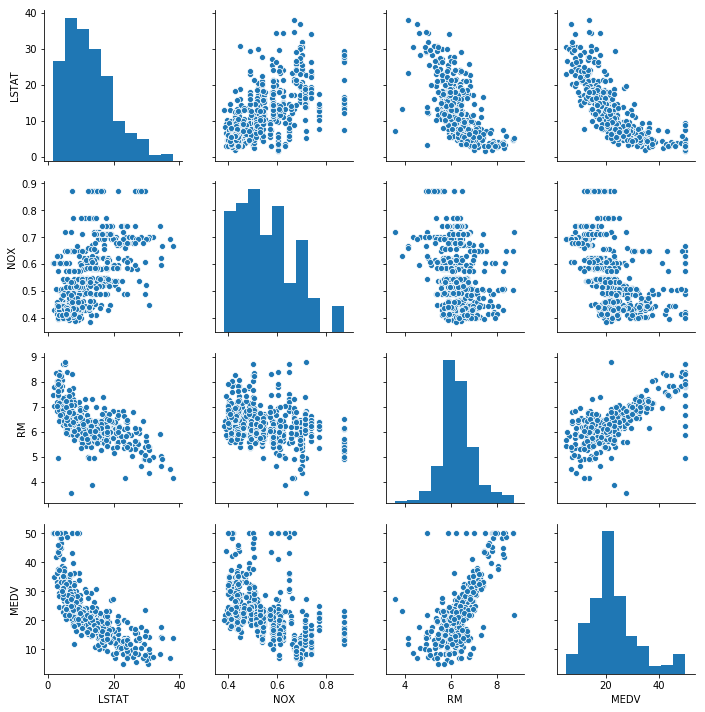

In [8]:
import seaborn as sns
df_boston0.describe()
cols = ["LSTAT","NOX","RM","MEDV"]
sns.pairplot(df_boston0[cols])
plt.show()

In [9]:
from sklearn import datasets
import numpy as np
boston = datasets.load_boston()
print(boston.DESCR)
housing = datasets.fetch_california_housing()
print(housing.DESCR)
x,y = boston.data, boston.target
datasets.make_*?

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Mean squared error: 21.89
RMSE:4.679191295697281


c:\python37\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['HYGothic-Medium'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


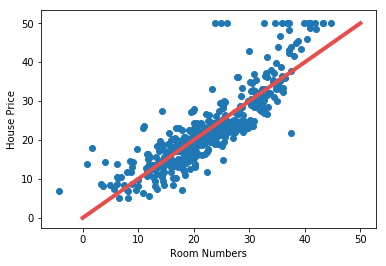

In [11]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error

boston = load_boston()
x=boston.data
y=boston.target
lr=LinearRegression()
lr.fit(x,y)
boston_pred = lr.predict(x)

print('Coefficients: \n',lr.coef_)
mse = mean_squared_error(y,boston_pred)
print("Mean squared error: %.2f"%mse)
rmse = np.sqrt(mean_squared_error(y,boston_pred))
print('RMSE:{}'.format(rmse))
fig,ax = plt.subplots()
ax.plot([0,50],[0,50],'-',color=(.9,.3,.3),lw=4)

ax.scatter(lr.predict(x),boston.target)
matplotlib.rc('font',family='HYGothic-Medium')
ax.set_xlabel(u'Room Numbers')
ax.set_ylabel(u'House Price')
fig.savefig('Figure_07_08.png')